Il file 'Data.csv' contiene i dati relativi al consumo di energia elettrica della macchina del caffè di Alexide.\
La colonna **Date** rappresenta data e ora della registrazione del sensore. Si noti che le date sono espresse in UTC.
Per convertirle nella timezone locale utilizzare\
`df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')`\
La colonna **Energy** rappresenta il consumo di energia totale, espresso in W*min (Watt minuto), a partire dall'accensione del sensore.
Si noti che il sensore è stato riavviato diverse volte nel periodo di osservazione e, a seguito di ciascun riavvio, il conteggio è ripartito da 0.\
La colonna **Topic** rappresenta il topic del messaggio mqtt ricevuto dal sensore.

Rappresentare i consumi totali in kWh (kiloWatt ora) con una heatmap che abbia sull'asse x le ore del giorno e sull'asse y il giorno della settimana.

Importazioni

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

Importazione CSV file

In [6]:
df = pd.read_csv(r'Data.csv', delimiter=';')     #lettura dati 
df['Date'] = pd.to_datetime(df['Date'], utc = True).dt.tz_convert('Europe/Berlin')  #conversione orario
df.head() # visualizzare tabella, le prime cinque righe

,Energy,Date,Topic
0,31678,2022-10-04 09:44:00+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
1,31680,2022-10-04 09:45:02+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
2,31688,2022-10-04 09:46:04+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
3,31692,2022-10-04 09:47:21+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy
4,31694,2022-10-04 09:48:15+02:00,shellies/shellyplug-s-D9B9EB/relay/0/energy


In [311]:
df = df.drop(columns=['Topic']) # elimina colonna con intestazione "Topic"
df # visualizza tabella

,Energy,Date
0,31678,2022-10-04 09:44:00+02:00
1,31680,2022-10-04 09:45:02+02:00
2,31688,2022-10-04 09:46:04+02:00
3,31692,2022-10-04 09:47:21+02:00
4,31694,2022-10-04 09:48:15+02:00
...,...,...
54789,129200,2022-08-01 00:29:21+02:00
54790,129200,2022-08-01 00:24:20+02:00
54791,129200,2022-08-01 00:19:21+02:00
54792,129200,2022-08-01 00:14:21+02:00


In [312]:
df = df.resample('H', on='Date').agg({'Energy': 'sum'}).reset_index() # reimpostare indice delle colonne, calcolare la somma della colonna energia in base ora
df

,Date,Energy
0,2022-08-01 00:00:00+02:00,1421200
1,2022-08-01 01:00:00+02:00,1421200
2,2022-08-01 02:00:00+02:00,1421200
3,2022-08-01 03:00:00+02:00,1421200
4,2022-08-01 04:00:00+02:00,1421200
...,...,...
1598,2022-10-06 14:00:00+02:00,3791481
1599,2022-10-06 15:00:00+02:00,4115329
1600,2022-10-06 16:00:00+02:00,3899991
1601,2022-10-06 17:00:00+02:00,4358237


In [313]:
df['Giorno'] = df['Date'].dt.dayofweek # aggiungere colonna giorno
df['Ora'] = df['Date'].dt.hour # aggiungere colonna ora
df

,Date,Energy,Giorno,Ora
0,2022-08-01 00:00:00+02:00,1421200,0,0
1,2022-08-01 01:00:00+02:00,1421200,0,1
2,2022-08-01 02:00:00+02:00,1421200,0,2
3,2022-08-01 03:00:00+02:00,1421200,0,3
4,2022-08-01 04:00:00+02:00,1421200,0,4
...,...,...,...,...
1598,2022-10-06 14:00:00+02:00,3791481,3,14
1599,2022-10-06 15:00:00+02:00,4115329,3,15
1600,2022-10-06 16:00:00+02:00,3899991,3,16
1601,2022-10-06 17:00:00+02:00,4358237,3,17


In [314]:
df = df.groupby(['Giorno', 'Ora']).sum() # raggruppamenti dei campi di giorno e d'ora
df

Energy
Giorno Ora          
0      0    23846337
       1    23218026
       2    22131393
       3    22590587
       4    23245814
...              ...
6      19   22510040
       20   21976321
       21   22108422
       22   21719542
       23   22198716

[168 rows x 1 columns]

In [315]:
df = df.unstack() # trasformazione della tabella 
df

Energy                                                              \
Ora           0         1         2         3         4         5         6    
Giorno                                                                         
0       23846337  23218026  22131393  22590587  23245814  23478416  23366311   
1       23730192  24223254  23171335  23864591  23263095  24053520  24756703   
2       29286542  28533250  29112706  28005101  27752405  27624010  28239904   
3       25973053  25765046  25809676  25766187  26153190  26219759  25355280   
4       18424938  19154612  18944594  19940086  19648375  19705587  20611328   
5       21009331  20990725  21362125  20897014  19623224  20518678  20488107   
6       21462823  20700517  20609474  20820440  21692642  21581468  20987482   

                                      ...                                \
Ora           7         8         9   ...        14        15        16   
Giorno                                ...                                 
0       24767003  38648865  45773954  ...  43550282  42969955  42777259   
1       28977681  39754470  47447033  ...  52701171  51961724  52755926   
2       37719872  48288965  46008147  ...  49613659  47695874  51016613   
3       32682730  44403226  51660823  ...  39279008  37493536  36638052   
4       24809805  31795318  38096700  ...  42362437  39822897  38102561   
5       22461659  28407501  28546233  ...  28662698  28724459  29062338   
6       26731810  29938855  30175910  ...  22513231  22767327  22713598   

                                                                              
Ora           17        18        19        20        21        22        23  
Giorno                                                                        
0       44409087  41636956  36968697  28266875  23831262  23495244  24255068  
1       49841046  46058811  31572786  29347549  28523599  28239258  28951907  
2       48245889  43771778  40094677  27432145  26150790  25781588  26642963  
3       36979447  30170301  23601678  19280487  19341965  18825030  19662503  
4       37646721  32174702  23956642  21163022  21186037  22175420  21232846  
5       29608134  25978987  21015090  20628858  21066456  21427421  20521936  
6       22411788  22169726  22510040  21976321  22108422  21719542  22198716  

[7 rows x 24 columns]

In [316]:
df.columns = df.columns.droplevel(0) # elimanare riga 'Energy'
df

Ora,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Giorno,,,,,,,,,,,,,,,,,,,,,
0,23846337,23218026,22131393,22590587,23245814,23478416,23366311,24767003,38648865,45773954,...,43550282,42969955,42777259,44409087,41636956,36968697,28266875,23831262,23495244,24255068
1,23730192,24223254,23171335,23864591,23263095,24053520,24756703,28977681,39754470,47447033,...,52701171,51961724,52755926,49841046,46058811,31572786,29347549,28523599,28239258,28951907
2,29286542,28533250,29112706,28005101,27752405,27624010,28239904,37719872,48288965,46008147,...,49613659,47695874,51016613,48245889,43771778,40094677,27432145,26150790,25781588,26642963
3,25973053,25765046,25809676,25766187,26153190,26219759,25355280,32682730,44403226,51660823,...,39279008,37493536,36638052,36979447,30170301,23601678,19280487,19341965,18825030,19662503
4,18424938,19154612,18944594,19940086,19648375,19705587,20611328,24809805,31795318,38096700,...,42362437,39822897,38102561,37646721,32174702,23956642,21163022,21186037,22175420,21232846
5,21009331,20990725,21362125,20897014,19623224,20518678,20488107,22461659,28407501,28546233,...,28662698,28724459,29062338,29608134,25978987,21015090,20628858,21066456,21427421,20521936
6,21462823,20700517,20609474,20820440,21692642,21581468,20987482,26731810,29938855,30175910,...,22513231,22767327,22713598,22411788,22169726,22510040,21976321,22108422,21719542,22198716


<Axes: xlabel='Ora', ylabel='Giorno'>

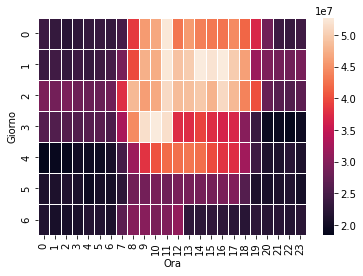

In [317]:
sns.heatmap(df, linewidths=.5)

La heatmap rappresentata visualizza il consumo energetico in un determinato periodo di tempo. 
La scala dei colori utilizzata indica la frequenza dei valori corrispondenti nella distribuzione dei dati.

Possiamo anche utilizzare le etichette degli assi per comprendere meglio le relazioni tra le variabili rappresentate. In questo esempio, l'asse X rappresenta l'ora, mentre l'asse Y rappresenta il giorno.

Osservando la heatmap, possiamo notare una zona chiara nella parte centrale-superiore della heatmap, il che significa che ci sono periodi in cui il consumo energetico è elevato, specialmente dalle 10.00 alle 17.00 nei giorni lavorativi, deducendo che la macchina del caffè è piuttosto impegnata all'inizio della giornata e dopo la pausa pranzo.
Al contrario, possiamo vedere una zona scura nella parte inferiore che segna periodi con un consumo energetico ridotto, specialmente prima delle 7.00 e dopo le 19.00, dato che in questi momenti, la macchina viene raramente utilizzata.
Inoltre, la mappa segna un bassissimo consumo nei giorni del weekend, quando la maggior parte del personale non accede all'ufficio.

La heatmap mostra anche diverse sfumature di colore all'interno delle aree chiare e scure, evidenziando variazioni nella frequenza del valore. Ad esempio, all'interno dell'area chiara nella parte centrale del giorno "0" (lunedì), possiamo notare diverse tonalità di arancione o giallo, che indicano una maggiore variabilità nel consumo energetico nelle diverse ore.